In [0]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from datetime import datetime
from sklearn.model_selection import train_test_split
import os

print("tensorflow version : ", tf.__version__)
print("tensorflow_hub version : ", hub.__version__)

tensorflow version :  1.15.0
tensorflow_hub version :  0.7.0


In [0]:
!pip install sentencepiece

     |████████████████████████████████| 1.0MB 2.8MB/s 


In [0]:
!pip install albert-tensorflow

     |████████████████████████████████| 81kB 2.4MB/s 


In [0]:
#Importing BERT modules
import albert
from albert import run_classifier
from albert import optimization
from albert import tokenization

In [0]:
# Set the output directory for saving model file
OUTPUT_DIR = '/GD/My Drive/Colab Notebooks/alBERT/bert_news_category'
#markdown Whether or not to clear/delete the directory and create a new one
DO_DELETE = False 
if DO_DELETE:
  try:
    tf.gfile.DeleteRecursively(OUTPUT_DIR)
  except:
    pass

tf.gfile.MakeDirs(OUTPUT_DIR)
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))


***** Model output directory: /GD/My Drive/Colab Notebooks/alBERT/bert_news_category *****


In [0]:
train = pd.read_excel(open('/GD/My Drive/Colab Notebooks/alBERT/bert_news_category/filetosend (1).xlsx', 'rb'), header = None)
test = pd.read_excel(open("/GD/My Drive/Colab Notebooks/alBERT/bert_news_category/test.xlsx",'rb'), header = None)

from sklearn.model_selection import train_test_split

train, val =  train_test_split(train, test_size = 0.2, random_state = 100)

In [0]:

#Training set sample
train[:10]

,0,1
826,56,how to use destructor
907,61,what are the python language identifiers
269,18,Define string special operators
1006,67,what are the various types of repetition cases
402,27,define iff statement
958,64,How will you get the max valued item of a list?
998,67,different types of special character classes
222,16,what is del statement?
97,7,what are the different types of operators in b...
239,16,which mathematical constants are predefined by...


In [0]:
train.columns=["Class_label", "Class_content"]
val.columns = ["Class_label", "Class_content"]

In [0]:
#Test set sample
test.head()

,0,1
0,1,hello
1,1,Hey there
2,1,whats up
3,2,see ya
4,2,cya


In [0]:
test.columns=["Class_label","Class_content"]

In [0]:
print("Training Set Shape :", train.shape)
print("Validation Set Shape :", val.shape)
print("Test Set Shape :", test.shape)

Training Set Shape : (840, 2)
Validation Set Shape : (211, 2)
Test Set Shape : (212, 2)


In [0]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 826 to 792
Data columns (total 2 columns):
Class_label      840 non-null int64
Class_content    840 non-null object
dtypes: int64(1), object(1)
memory usage: 19.7+ KB
None


In [0]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 2 columns):
Class_label      212 non-null int64
Class_content    212 non-null object
dtypes: int64(1), object(1)
memory usage: 3.4+ KB
None


In [0]:
#Features in the dataset
train.columns

Index(['Class_label', 'Class_content'], dtype='object')

In [0]:
#unique classes
train['Class_label'].unique()

array([56, 61, 18, 67, 27, 64, 16,  7,  5, 12, 70, 14, 39, 40, 47, 60, 37,
       11, 57, 58, 22, 63, 69,  2, 36, 17,  8,  3, 59, 28, 44, 35, 32, 13,
       29, 34,  1, 33, 23, 62, 15, 46, 53, 30, 31, 20, 49, 24,  4, 21, 66,
       26, 25, 43, 38, 19, 45, 48,  6, 51, 65, 42, 55, 50, 52, 10, 41, 54,
        9, 68])

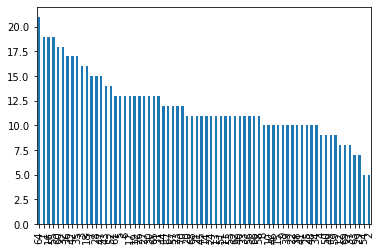

In [0]:
#Distribution of classes
train['Class_label'].value_counts().plot(kind = 'bar')

In [0]:
DATA_COLUMN = 'Class_content'
LABEL_COLUMN = 'Class_label'
# The list containing all the classes (train['SECTION'].unique())
label_list = [ 17, 11, 44, 47,  9,  7, 59, 26, 67, 56, 35, 18, 60, 37, 36, 42, 68,
       22, 64,  3, 61, 16, 33,  5, 12, 28, 14, 25, 57, 38, 52, 49, 51, 39,
       65, 69, 45, 32, 66, 13, 30, 43,  1, 31, 62, 15, 27, 63, 41, 23, 50,
        8, 53, 21,  4, 34,  2, 46, 19, 20, 40, 29,  6, 55, 54, 48, 10, 24,
       58, 70]

In [0]:
len(label_list)

70

In [0]:
pip install Unidecode

In [0]:
import pandas as pd
l = []
for i in train['Class_content']:
   i.encode('utf-8')
   i.encode('ascii','ignore')
   i.encode('ascii','replace') 
   l.append(i)
df.index = train.index
df['Class_content'] = pd.DataFrame(l)
print(df)
#train['Class_content'] = df[0] 
print(train)
#for i in l:
  #print(i)   

                                                      0                                   Class_content
826                               how to use destructor      in how many we can find packages in python
907            what are the python language identifiers                                             NaN
269                     Define string special operators                              what is exceptions
1006     what are the various types of repetition cases                                             NaN
402                                define iff statement   what are the different functions for datetime
...                                                 ...                                             ...
802   what are the different types of base overloadi...                    how to append a list to list
53    what are the various types of operators in python                            its good  seeing you
350   does any available modules and packages for da...  What is

In [0]:
from unidecode import unidecode
def remmove_non_ascii(text):
  return unidecode(text)

In [0]:

for i in train['Class_content']:
  x = remmove_non_ascii(i)
  print(type(x))

<class 'str'>


AttributeError: ignored

In [0]:
train['Class_content'] = x

In [0]:
train_InputExamples = train.apply(lambda x: albert.run_classifier.InputExample(guid=None,
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)
val_InputExamples = val.apply(lambda x: albert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)


In [0]:

train_InputExamples

826     <albert.run_classifier.InputExample object at ...
907     <albert.run_classifier.InputExample object at ...
269     <albert.run_classifier.InputExample object at ...
1006    <albert.run_classifier.InputExample object at ...
402     <albert.run_classifier.InputExample object at ...
                              ...                        
802     <albert.run_classifier.InputExample object at ...
53      <albert.run_classifier.InputExample object at ...
350     <albert.run_classifier.InputExample object at ...
79      <albert.run_classifier.InputExample object at ...
792     <albert.run_classifier.InputExample object at ...
Length: 840, dtype: object

In [0]:

print("Row 0 - guid of training set : ", train_InputExamples.iloc[0].guid)
print("\n__________\nRow 0 - text_a of training set : ", train_InputExamples.iloc[0].text_a)
print("\n__________\nRow 0 - text_b of training set : ", train_InputExamples.iloc[0].text_b)
print("\n__________\nRow 0 - label of training set : ", train_InputExamples.iloc[0].label)

Row 0 - guid of training set :  None

__________
Row 0 - text_a of training set :  how to use destructor

__________
Row 0 - text_b of training set :  None

__________
Row 0 - label of training set :  56


In [0]:

# This is a path to an uncased (all lowercase) version of BERT
BERT_MODEL_HUB = ""

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return bert.tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

tokenizer = create_tokenizer_from_hub_module()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


UnicodeDecodeError: ignored